In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)


In [36]:
df1 = pd.read_csv("data.csv")
df1.head()


,id,price_tnd,price_eur,location,city,governorate,Area,pieces,room,bathroom,...,garden,concierge,beach_view,mountain_view,pool,elevator,furnished,equipped_kitchen,central_heating,air_conditioning
0,b9e1c759-d149-46e8-9765-d8c198a13ff0,NaN,NaN,Cité El Bassatine Ancien,Boumhel Bassatine,Ben Arous,NaN,27.0,8.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,863e62e5-0bfe-49f3-ad97-e0ae91be68e9,3250000.0,1007500.0,El Kantaoui,Hammam Sousse,Sousse,1000.0,26.0,16.0,14.0,...,0,1,1,0,0,1,1,1,1,1
2,0048e6da-9aec-4ebe-8ee1-1ad7cd0015e6,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1
3,032f818f-1b38-4d1a-a000-753e235ccf54,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,NaN,...,0,0,0,0,0,0,1,1,1,1
4,2272576f-fb3b-4c82-8a0e-a00fe2e7c154,2000000.0,620000.0,Sousse Corniche,Sousse Ville,Sousse,932.0,24.0,24.0,10.0,...,0,0,0,0,0,0,1,1,1,1


In [37]:
df1.shape

(8129, 26)

In [38]:
df1.groupby('location')['location'].agg('count')

location
Abou El Kacem Chebbi      4
Aghir                    12
Ain Zaghouan Nord       144
Ain Zaghouan Sud         24
Ajim                      2
                       ... 
Zaouit Mornag             1
Zarzis                    5
Zarzouna                  5
Zone Touristique         26
Zone touristique          3
Name: location, Length: 468, dtype: int64

In [39]:
df2 = df1.drop(['pool','elevator','furnished','governorate', 'price_tnd', 'city', 'latt', 'long', 'concierge', 'garden', 'pieces', 'id', 'elevator','air_conditioning', 'equipped_kitchen', 'furnished'], axis='columns')
df2.head()

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,NaN,Cité El Bassatine Ancien,NaN,8.0,NaN,NaN,NaN,30.815266,0,0,0,0
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1
2,620000.0,Sousse Corniche,932.0,24.0,10.0,NaN,1.0,118.317747,0,0,0,1
3,620000.0,Sousse Corniche,932.0,24.0,NaN,NaN,NaN,118.316886,0,0,0,1
4,620000.0,Sousse Corniche,932.0,24.0,10.0,NaN,1.0,118.316886,0,0,0,1


In [40]:
df2.isnull().sum()

price_eur              1708
location                  0
Area                    185
room                    409
bathroom                659
age                    4145
state                  1100
distance_to_capital      35
garage                    0
beach_view                0
mountain_view             0
central_heating           0
dtype: int64

In [41]:
df3 = df2.dropna()
df3.isnull().sum()

price_eur              0
location               0
Area                   0
room                   0
bathroom               0
age                    0
state                  0
distance_to_capital    0
garage                 0
beach_view             0
mountain_view          0
central_heating        0
dtype: int64

In [42]:
df3.shape

(2972, 12)

In [43]:
df3.head()

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1
5,310000.0,Sousse Riadh,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1
16,294500.0,El Gourjani,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0


In [44]:
df3.Area.unique()

array([ 1000.,   462.,   510.,   538.,   400.,   220.,   800.,   750.,
         600.,   630.,   460.,   700.,   500.,   420.,   350.,   300.,
        2000.,  1900.,  1187.,   980.,   760.,   550.,   515.,   385.,
         120.,  6800.,  4000.,   900.,   865.,   780.,   761.,   652.,
         480.,   446.,   360.,   266.,   265.,   262.,   222.,   150.,
        1200.,   680.,   463.,   444.,   416.,   410.,   320.,   200.,
         161., 10000.,  6000.,  2700.,  1370.,  1300.,  1021.,   966.,
         960.,   790.,   650.,   504.,   454.,   451.,   380.,   318.,
         295.,   270.,   240.,   206.,   178.,   124., 12000.,  1330.,
        1104.,   670.,   667.,   660.,   613.,   578.,   495.,   485.,
         483.,   470.,   458.,   440.,   412.,   330.,   280.,   164.,
         143., 18000.,  2058.,  1350.,  1311.,  1180.,  1152.,  1120.,
        1080.,  1040.,   886.,   858.,   840.,   833.,   806.,   801.,
         730.,   705.,   675.,   628.,   577.,   570.,   540.,   453.,
      

In [45]:
df5 = df3.copy()
df5['price_per_m2'] = df5['price_eur'] / df5['Area']
df5.head()

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
5,310000.0,Sousse Riadh,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0,310.000000
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1,1341.991342
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1,729.411765
16,294500.0,El Gourjani,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0,547.397770


In [46]:
len(df5.location.unique())

316

In [47]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Hammamet                138
Hammamet Nord           115
La Soukra               113
Cité Ennasr 2           113
Djerba                  103
                       ... 
Cité El Behi Ladghem      1
M'saken                   1
Maakel Ezzaim             1
Cité El Baccouch          1
Abou El Kacem Chebbi      1
Name: location, Length: 316, dtype: int64

In [48]:
location_less_than_10 = location_stats[location_stats<=10]

In [49]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_less_than_10 else x)

In [50]:
len(df5.location.unique())


60

In [51]:
df5.head(10)

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
1,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
5,310000.0,other,1000.0,16.0,9.0,1-5,2.0,119.603211,1,0,0,0,310.000000
10,620000.0,Kélibia,462.0,12.0,13.0,1-5,2.0,14.249053,0,1,0,1,1341.991342
11,372000.0,Bou Mhel,510.0,14.0,4.0,5-10,1.0,30.815266,1,0,1,1,729.411765
16,294500.0,other,538.0,16.0,5.0,30-50,1.0,2.191132,0,0,0,0,547.397770
18,201500.0,Raoued,400.0,9.0,4.0,1-5,2.0,17.242821,1,0,0,1,503.750000
19,34100.0,other,220.0,9.0,4.0,5-10,1.0,341.757988,0,0,0,0,155.000000
20,682000.0,Hammamet,1000.0,6.0,6.0,1-5,1.0,65.459722,1,0,0,1,682.000000
21,604500.0,Riadh al Andalous,800.0,10.0,8.0,0,2.0,6.324988,0,0,1,1,755.625000
22,263500.0,other,750.0,8.0,4.0,1-5,1.0,61.264218,1,1,1,0,351.333333


In [52]:
avg_room_size = 29.33 #medium sized room on https://safacts.co.za/average-size-of-a-bedroom-in-south-africa/

df5[df5.Area/df5.room<avg_room_size].head()
df5.shape

(2972, 13)

In [53]:
df6 = df5[~(df5.Area/df5.room<avg_room_size)]
df6.shape

(2906, 13)

In [54]:
df6.price_per_m2.describe()

count     2906.000000
mean       802.151161
std        855.389667
min          1.085000
25%        516.666667
50%        740.722403
75%        977.329159
max      38750.000000
Name: price_per_m2, dtype: float64

In [55]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_m2)
        st = np.std(subdf.price_per_m2)
        reduced_df = subdf[(subdf.price_per_m2>(m-st)) & (subdf.price_per_m2<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outlier(df6)
df7.shape

(2222, 13)

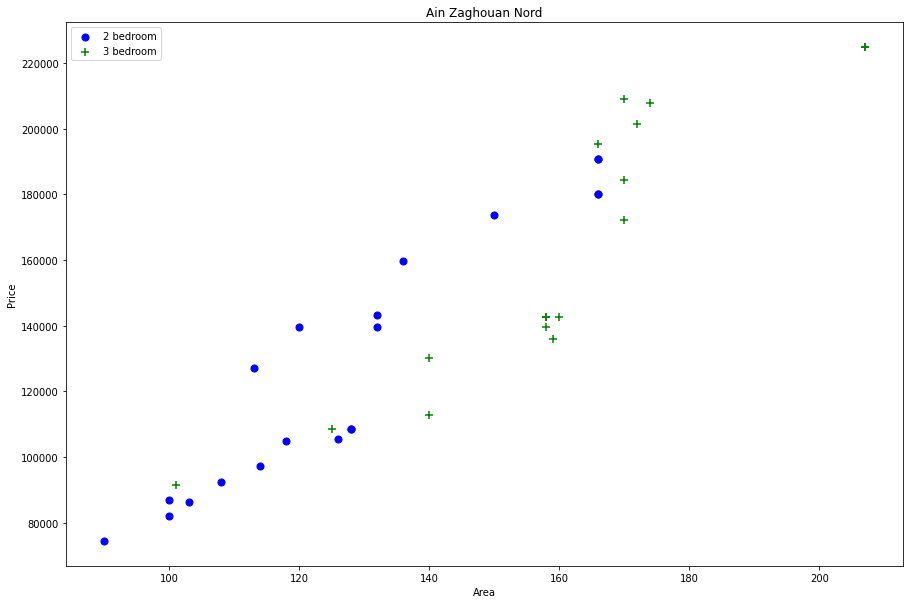

In [56]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.room==2)]
    bhk3 = df[(df.location==location) & (df.room==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.Area,bhk2.price_eur,color='blue',label='2 bedroom', s=50)
    plt.scatter(bhk3.Area,bhk3.price_eur,marker='+',color='green',label='3 bedroom', s=50)
    plt.xlabel("Area")
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Ain Zaghouan Nord")

In [57]:
df7.head(20).sort_values(by = 'location')

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,1-5,1.0,17.722190,0,0,0,0,897.368421
17,190650.00,Ain Zaghouan Nord,166.0,2.0,1.0,0,2.0,17.722190,0,0,0,1,1148.493976
16,184450.00,Ain Zaghouan Nord,170.0,3.0,1.0,0,2.0,17.722190,0,0,0,1,1085.000000
15,108500.00,Ain Zaghouan Nord,125.0,3.0,2.0,1-5,1.0,17.722190,0,0,0,0,868.000000
14,130200.00,Ain Zaghouan Nord,140.0,3.0,2.0,1-5,1.0,2.191132,1,0,0,0,930.000000
13,139500.00,Ain Zaghouan Nord,158.0,3.0,2.0,5-10,2.0,12.885850,1,0,0,1,882.911392
12,142600.00,Ain Zaghouan Nord,158.0,3.0,2.0,0,2.0,17.722190,1,0,0,1,902.531646
11,142600.00,Ain Zaghouan Nord,158.0,3.0,2.0,0,2.0,17.722190,1,0,0,0,902.531646
10,142600.00,Ain Zaghouan Nord,160.0,3.0,3.0,1-5,2.0,12.885850,1,0,0,1,891.250000
9,195300.00,Ain Zaghouan Nord,166.0,3.0,2.0,0,2.0,17.722190,0,0,0,1,1176.506024


In [58]:
def remove_room_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        room_stats = {}
        for room, room_df in location_df.groupby('room'):
            room_stats[room] = {
                'mean': np.mean(room_df.price_per_m2),
                'std': np.std(room_df.price_per_m2),
                'count': room_df.shape[0]
            }
        for room, room_df in location_df.groupby('room'):
            stats = room_stats.get(room-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, room_df[room_df.price_per_m2<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_room_outlier(df7)
df8.shape

(1478, 13)

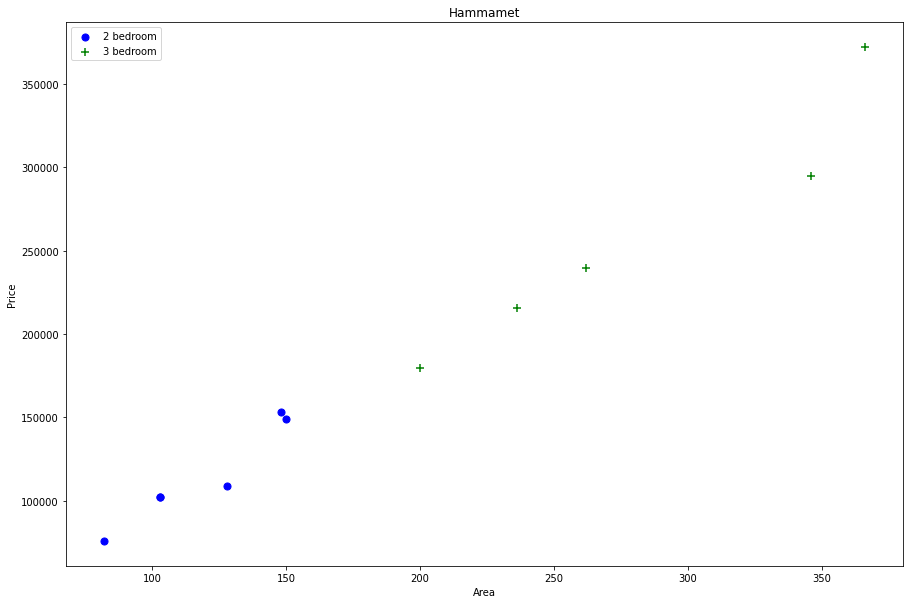

In [59]:
plot_scatter_chart(df8,"Hammamet")

Text(0, 0.5, 'Count')

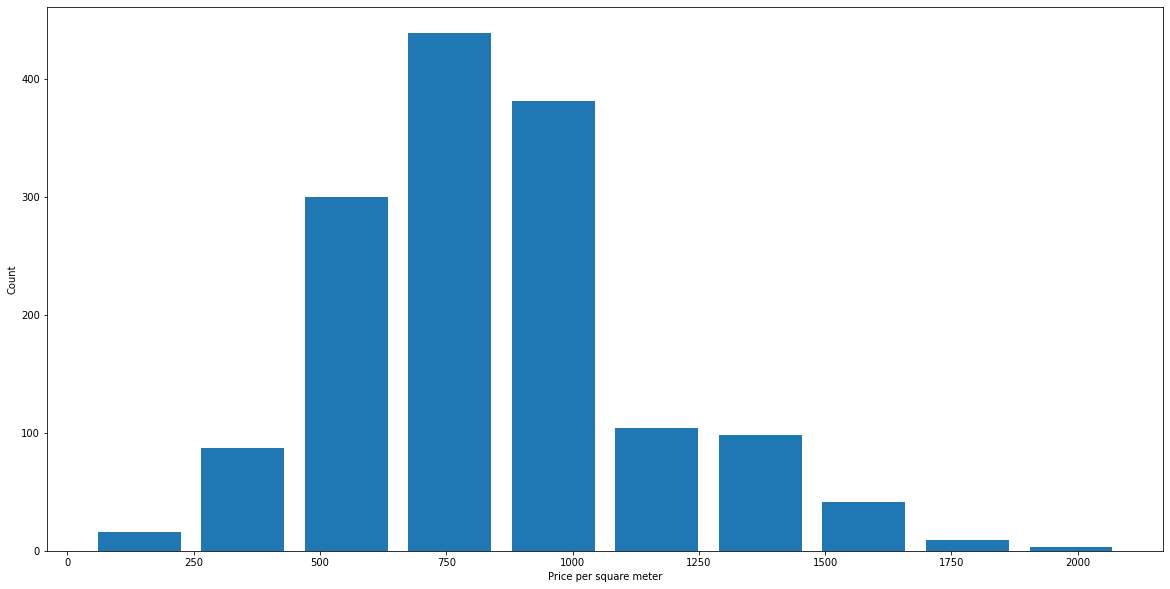

In [60]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_m2,rwidth=0.8)
plt.xlabel("Price per square meter")
plt.ylabel("Count")


In [61]:
df8.bathroom.unique()

array([ 4.,  2.,  3.,  1.,  5., 14.,  6.,  8.,  9., 12.,  7.])

In [62]:
df8[df8.bathroom>10]

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
561,1007500.0,El Kantaoui,1000.0,16.0,14.0,30-50,1.0,108.792932,1,1,0,1,1007.500000
1619,434000.0,other,420.0,12.0,12.0,0,2.0,173.267711,0,0,0,1,1033.333333


Text(0, 0.5, 'Count')

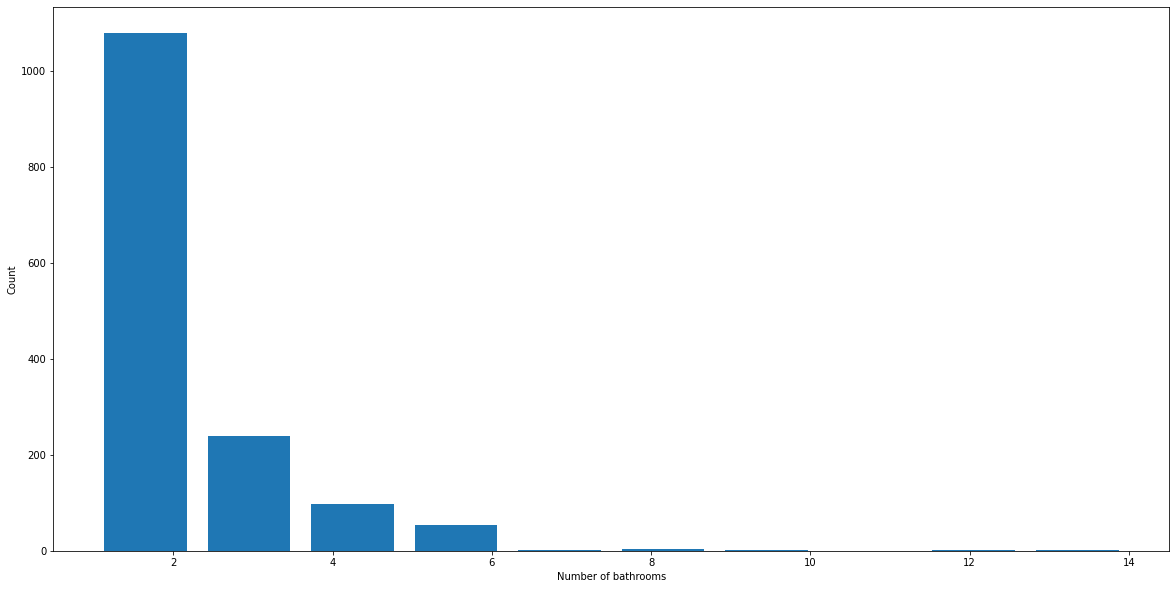

In [63]:
plt.hist(df8.bathroom,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")


In [64]:
df9 = df8[df8.bathroom<df8.room+2]
df9.shape

(1474, 13)

In [65]:
df9.head(20).sort_values(by = 'location')

,price_eur,location,Area,room,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,price_per_m2
0,682000.00,Ain Zaghouan Nord,760.0,9.0,4.0,1-5,1.0,17.722190,0,0,0,0,897.368421
30,127100.00,Ain Zaghouan Nord,113.0,2.0,2.0,0,2.0,17.722190,1,0,0,1,1124.778761
28,139500.00,Ain Zaghouan Nord,120.0,2.0,2.0,0,2.0,13.621007,1,0,0,1,1162.500000
24,139500.00,Ain Zaghouan Nord,132.0,2.0,2.0,0,2.0,17.722190,0,0,0,1,1056.818182
23,159650.00,Ain Zaghouan Nord,136.0,2.0,2.0,0,2.0,12.885850,0,0,0,0,1173.897059
21,173600.00,Ain Zaghouan Nord,150.0,2.0,2.0,0,2.0,10.201342,0,0,0,1,1157.333333
19,180110.00,Ain Zaghouan Nord,166.0,2.0,2.0,1-5,2.0,12.885850,0,0,0,0,1085.000000
18,190650.00,Ain Zaghouan Nord,166.0,2.0,2.0,0,2.0,17.722190,1,0,0,0,1148.493976
17,190650.00,Ain Zaghouan Nord,166.0,2.0,1.0,0,2.0,17.722190,0,0,0,1,1148.493976
16,184450.00,Ain Zaghouan Nord,170.0,3.0,1.0,0,2.0,17.722190,0,0,0,1,1085.000000


In [72]:
df10 = df9.drop(['room','price_per_m2'], axis='columns')
df10.head(3)

,price_eur,location,Area,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,682000.00,Ain Zaghouan Nord,760.0,4.0,1-5,1.0,17.72219,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,0,2.0,17.72219,0,0,0,1
3,224866.25,Ain Zaghouan Nord,207.0,3.0,0,2.0,17.72219,1,0,0,1


In [131]:
def convert_age_to_avg(a):
    tokens = a.split('-') 
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(a)
    except:
        return None

In [132]:
df11 = df10.copy()
df11['age'] = df11['age'].apply(convert_age_to_avg)
df11.dropna(subset=['age'], inplace=True)
df11.head(3)


,price_eur,location,Area,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating
0,682000.00,Ain Zaghouan Nord,760.0,4.0,3.0,1.0,17.72219,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,0.0,2.0,17.72219,0,0,0,1
3,224866.25,Ain Zaghouan Nord,207.0,3.0,0.0,2.0,17.72219,1,0,0,1


In [133]:
df11.age.unique()

array([ 3. ,  0. ,  7.5, 15. , 25. , 40. , 60. , 85. ])

In [135]:
dummies = pd.get_dummies(df11.location)
dummies.head(3)

,Ain Zaghouan Nord,Ain Zaghouan Sud,Aouina,Ariana,Bhar Lazreg,Bizerte,Borj Cedria,Borj Louzir,Bou Mhel,Carthage,...,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df12 = pd.concat([df11,dummies.drop('other',axis='columns')],axis='columns')
df12.head(3)

,price_eur,location,Area,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,682000.00,Ain Zaghouan Nord,760.0,4.0,3.0,1.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180110.00,Ain Zaghouan Nord,166.0,2.0,0.0,2.0,17.72219,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,224866.25,Ain Zaghouan Nord,207.0,3.0,0.0,2.0,17.72219,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df13 = df12.drop('location',axis='columns')
df13.head(3)

,price_eur,Area,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,682000.00,760.0,4.0,3.0,1.0,17.72219,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180110.00,166.0,2.0,0.0,2.0,17.72219,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,224866.25,207.0,3.0,0.0,2.0,17.72219,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df13.shape

(1431, 69)

In [140]:
x = df13.drop(['price_eur'], axis='columns')
x.head(3)

,Area,bathroom,age,state,distance_to_capital,garage,beach_view,mountain_view,central_heating,Ain Zaghouan Nord,...,Mornag,Mutuelle Ville,Nabeul,Nouvelle Medina,Raoued,Riadh al Andalous,Sahloul,Sidi Daoued,Sidi El Mahrsi,Yasmine Hammamet
0,760.0,4.0,3.0,1.0,17.72219,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,166.0,2.0,0.0,2.0,17.72219,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,207.0,3.0,0.0,2.0,17.72219,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [141]:
y = df13.price_eur
y.head(3)

0    682000.00
2    180110.00
3    224866.25
Name: price_eur, dtype: float64

In [142]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [143]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)


0.8346863748203824

In [144]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82236518, 0.93519891, 0.82781796, 0.81688953, 0.70809086])